In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [11]:


x = tf.placeholder(tf.float32, shape=[None, 28*28], name='X')
x_image = tf.reshape(x, [-1, 28, 28, 1])


y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [0]:
def new_conv_layer(input, num_input_channels, filter_size, num_filters, name):
    
    with tf.variable_scope(name,reuse=tf.AUTO_REUSE) as scope:
        # Shape of the filter-weights for the convolution
        shape = [filter_size, filter_size, num_input_channels, num_filters]

        # Create new weights (filters) with the given shape
        weights = tf.get_variable('w',shape,initializer=tf.contrib.layers.xavier_initializer())
        
       # weights=tf.get_variable('weight',shape)

        # Create new biases, one for each filter
        
        biases = tf.get_variable('b',initializer=tf.zeros([num_filters]))
       
        #biases=tf.get_variable('biase',[num_filters])

        # TensorFlow operation for convolution
        layer = tf.nn.conv2d(input=input, filter=weights, strides=[1, 1, 1, 1], padding='SAME')

        # Add the biases to the results of the convolution.
        layer += biases
        
        return layer, weights

In [0]:
def new_pool_layer(input, name):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.max_pool(value=input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        
        return layer

In [0]:
def new_relu_layer(input, name):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.relu(input)
        
        return layer

In [0]:
def new_fc_layer(input, num_inputs, num_outputs, name):
    
    with tf.variable_scope(name,reuse=tf.AUTO_REUSE) as scope:

        # Create new weights and biases.
        weights = tf.get_variable('w',[num_inputs, num_outputs],initializer=tf.contrib.layers.xavier_initializer())
        biases = tf.get_variable('b',initializer=tf.zeros([num_outputs]))
        
        # Multiply the input and weights, and then add the bias-values.
        layer = tf.matmul(input, weights) + biases
        
        return layer

In [0]:
# Convolutional Layer 1# Convol 
layer_conv1, weights_conv1 = new_conv_layer(input=x_image, num_input_channels=1, filter_size=5, num_filters=6, name ="conv1")

# Pooling Layer 1
layer_pool1 = new_pool_layer(layer_conv1, name="pool1")

# RelU layer 1
layer_relu1 = new_relu_layer(layer_pool1, name="relu1")

# Convolutional Layer 2
layer_conv2, weights_conv2 = new_conv_layer(input=layer_relu1, num_input_channels=6, filter_size=5, num_filters=16, name= "conv2")

# Pooling Layer 2
layer_pool2 = new_pool_layer(layer_conv2, name="pool2")

# RelU layer 2
layer_relu2 = new_relu_layer(layer_pool2, name="relu2")

# Flatten Layer
num_features = layer_relu2.get_shape()[1:4].num_elements()
layer_flat = tf.reshape(layer_relu2, [-1, num_features])

# Fully-Connected Layer 1
layer_fc1 = new_fc_layer(layer_flat, num_inputs=num_features, num_outputs=128, name="fc1")

# RelU layer 3
layer_relu3 = new_relu_layer(layer_fc1, name="relu3")

# Fully-Connected Layer 2
layer_fc2 = new_fc_layer(input=layer_relu3, num_inputs=128, num_outputs=10, name="fc2")

In [0]:
with tf.variable_scope("Softmax"):
    y_pred = tf.nn.softmax(layer_fc2)
    y_pred_cls = tf.argmax(y_pred, dimension=1)

In [0]:

with tf.name_scope("cross_ent"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2, labels=y_true)
    cost = tf.reduce_mean(cross_entropy)

# batch gradient descent

In [0]:

learning_rate=0.01
#shape = [filter_size, filter_size, num_input_channels, num_filters]


#optimizing using shocisitc gradient descent  tf.AUTO_REUSE


with tf.name_scope("gradient_descent"):
  new_cost=tf.reduce_mean(-tf.reduce_sum(y_true*tf.log(y_pred),reduction_indices=1))
  
  
  with tf.variable_scope('conv1',reuse=tf.AUTO_REUSE) as scope:
    
    weights=tf.get_variable('w',shape=[5,5,1,6])
    
    biases=tf.get_variable('b',shape=[6])
    
    grad_W, grad_b = tf.gradients(xs=[weights, biases], ys=new_cost)
    
    new_weights = weights.assign(weights - learning_rate * grad_W)
    
    new_biases = biases.assign(biases - learning_rate * grad_b)
  
  with tf.variable_scope('conv2',reuse=True) as scope:
    
    weights=tf.get_variable('w',shape=[5,5,6,16])
    
    biases=tf.get_variable('b',shape=[16])
   
    grad_W, grad_b = tf.gradients(xs=[weights, biases], ys=new_cost)
    
    new_weights = weights.assign(weights - learning_rate * grad_W)
    
    new_biases = biases.assign(biases - learning_rate * grad_b)
  
  with tf.variable_scope('fc1',reuse=True) as scope:
    
    weights=tf.get_variable('w',shape=[num_features,128])
    
    biases=tf.get_variable('b',shape=[128])
    
    grad_W, grad_b = tf.gradients(xs=[weights, biases], ys=new_cost)
    
    new_weights = weights.assign(weights - learning_rate * grad_W)
    
    new_biases = biases.assign(biases - learning_rate * grad_b)
  
  with tf.variable_scope('fc2',reuse= True) as scope:
    
    weights=tf.get_variable('w',shape=[128,10])
    
    biases=tf.get_variable('b',shape=[10])
    
    grad_W, grad_b = tf.gradients(xs=[weights, biases], ys=new_cost)
    
    new_weights = weights.assign(weights - learning_rate * grad_W)
    
    new_biases = biases.assign(biases - learning_rate * grad_b)
    
    


# accuracy

In [0]:
# Accuracy
with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(y_pred_cls, y_true_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [22]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
eval_data = mnist.test.images

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [0]:
num_epochs = 250
batch_size = 100
cost_list=[]
accuracy_list=[]
softmax_values=[]

In [0]:
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    # Add the model graph to TensorBoard
    
    
    # Loop over number of epochs
    for epoch in range(num_epochs):
        
        train_accuracy = 0
        
        for batch in range(0, int(len(data.train.labels)/batch_size)):
            
            # Get a batch of images and labels
            x_batch, y_true_batch = data.train.next_batch(batch_size)
            
            # Put the batch into a dict with the proper names for placeholder variables
            feed_dict_train = {x: x_batch, y_true: y_true_batch}
            
            # Run the optimizer using this batch of training data.
            #sess.run(optimizer, feed_dict=feed_dict_train)
            cost_1,final_weights,final_biases=sess.run([new_cost,new_weights,new_biases],feed_dict_train)
            
            # Calculate the accuracy on the batch of training data
            train_accuracy += sess.run(accuracy, feed_dict=feed_dict_train)
            
            # feeding the training data
            feed_dict_test = {x:eval_data}
        
        train_accuracy /= int(len(data.train.labels)/batch_size)
        
        #  calculating the softmax on training data 
        soft_max=sess.run(y_pred_cls,feed_dict=feed_dict_test)
        
        accuracy_list.append(train_accuracy)
        cost_list.append(cost_1)
        
      
    softmax_values=soft_max.copy()

Text(0.5,0,'no on epochs')

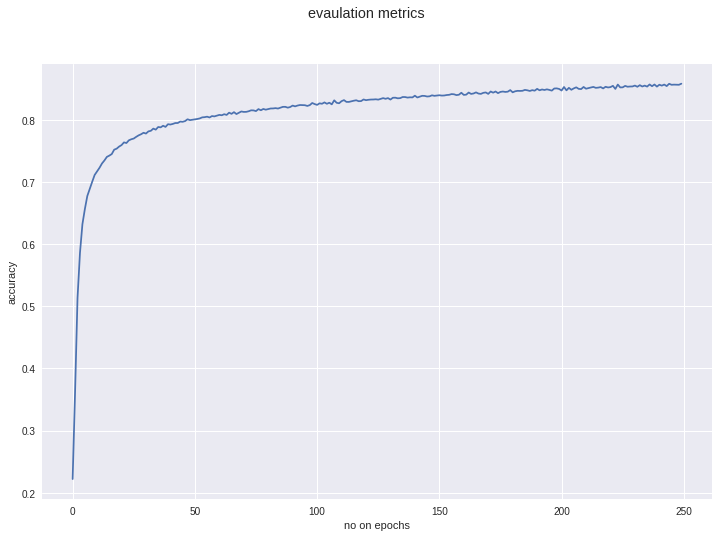

In [47]:
fig,axes=plt.subplots(sharex=True,figsize=(12,8))
fig.suptitle("evaulation metrics")
axes.plot(accuracy_list)
axes.set_ylabel("accuracy")
axes.set_xlabel("no on epochs")

Text(0.5,0,'no on epochs')

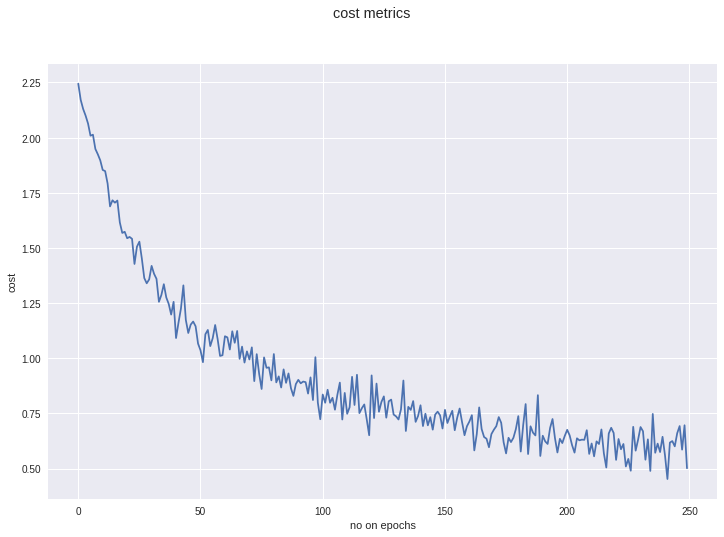

In [49]:
fig,axes=plt.subplots(sharex=True,figsize=(12,8))
fig.suptitle("cost metrics")
axes.plot(cost_list)
axes.set_ylabel("cost")
axes.set_xlabel("no on epochs")

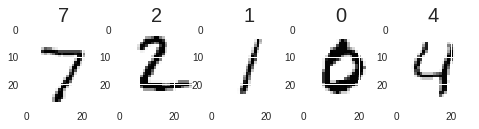

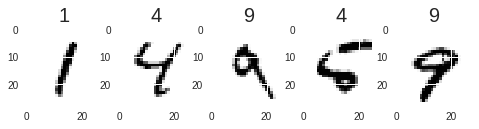

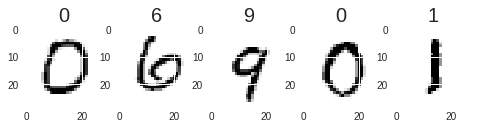

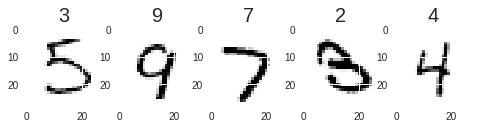

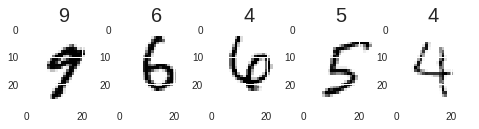

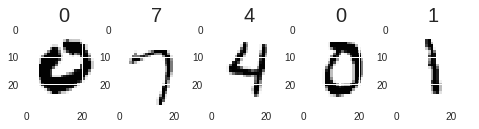

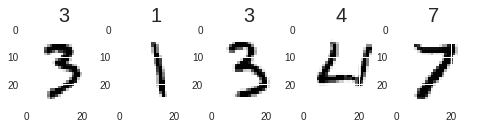

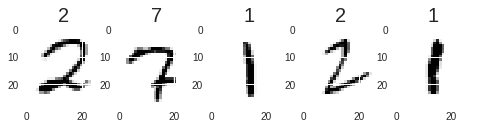

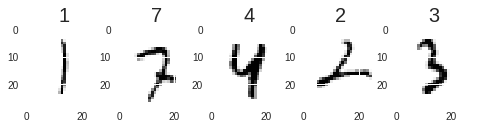

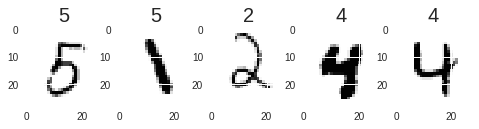

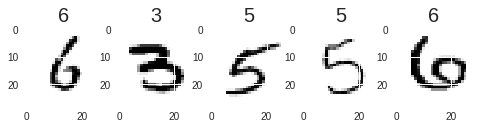

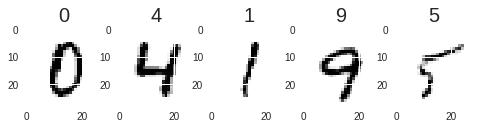

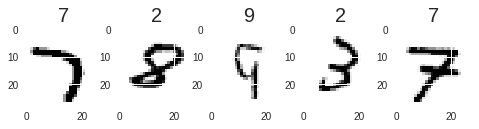

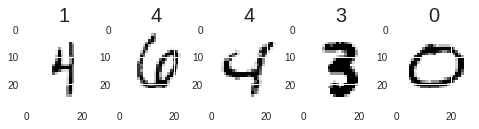

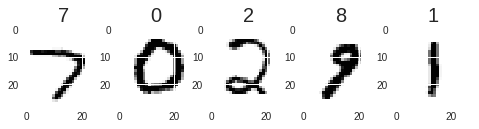

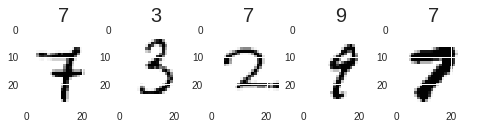

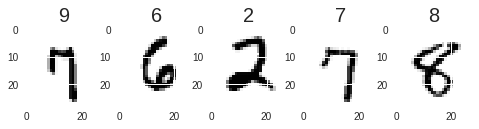

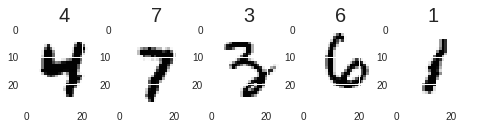

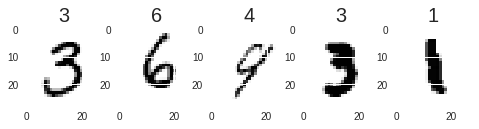

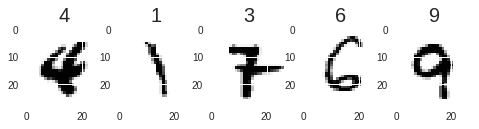

In [52]:
### -----output 1 to 100 images -----####
a=0
for i in range(100):
  plt.figure(a//5)
  eval_data_plot=eval_data[i].reshape((28,28))
  plt.subplot(1,5,a%5+1)
  a+=1
  plt.imshow(eval_data_plot)
  plt.title(softmax_values[i],fontsize=20)
  